<a href="https://colab.research.google.com/github/davidzeck/Air-quality-prediction-SVM-/blob/main/Working_SVM_Air_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns##Seaborn library check
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score#MSE Library check


In [ ]:
#Loading the data set
Data = pd.read_csv("city_day.csv")

In [ ]:
#Data Pre processing

Data.head(1000)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-29,83.13,NaN,6.93,28.71,33.72,NaN,6.93,49.52,59.76,0.02,0.00,3.14,209.0,Poor
1,Ahmedabad,2015-01-30,79.84,NaN,13.85,28.68,41.08,NaN,13.85,48.49,97.07,0.04,0.00,4.81,328.0,Very Poor
2,Ahmedabad,2015-01-31,94.52,NaN,24.39,32.66,52.61,NaN,24.39,67.39,111.33,0.24,0.01,7.67,514.0,Severe
3,Ahmedabad,2015-02-01,135.99,NaN,43.48,42.08,84.57,NaN,43.48,75.23,102.70,0.40,0.04,25.87,782.0,Severe
4,Ahmedabad,2015-02-02,178.33,NaN,54.56,35.31,72.80,NaN,54.56,55.04,107.38,0.46,0.06,35.61,914.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ahmedabad,2018-09-27,24.07,NaN,20.32,133.00,80.04,NaN,20.32,45.29,75.33,3.94,16.02,0.65,413.0,Severe
996,Ahmedabad,2018-09-28,25.90,NaN,40.29,165.62,110.86,NaN,40.29,56.95,37.07,3.94,16.02,0.65,680.0,Severe
997,Ahmedabad,2018-09-29,29.80,NaN,42.91,169.17,114.54,NaN,42.91,64.17,53.00,3.94,16.02,0.65,787.0,Severe
998,Ahmedabad,2018-09-30,29.37,NaN,42.88,163.30,111.66,NaN,42.88,60.33,44.38,3.94,16.02,0.65,862.0,Severe


In [ ]:
Data.shape

(26894, 16)

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26894 entries, 0 to 26893
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        26894 non-null  object 
 1   Date        26894 non-null  object 
 2   PM2.5       24888 non-null  float64
 3   PM10        18241 non-null  float64
 4   NO          25769 non-null  float64
 5   NO2         25789 non-null  float64
 6   NOx         24320 non-null  float64
 7   NH3         19064 non-null  float64
 8   CO          25799 non-null  float64
 9   SO2         25503 non-null  float64
 10  O3          25335 non-null  float64
 11  Benzene     22422 non-null  float64
 12  Toluene     20016 non-null  float64
 13  Xylene      9988 non-null   float64
 14  AQI         24795 non-null  float64
 15  AQI_Bucket  24795 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.3+ MB


In [ ]:
#Data Preprocessing
# 1.Missing Data
# Check for any missing values in the columns
Data.isnull().sum()

City              0
Date              0
PM2.5          2006
PM10           8653
NO             1125
NO2            1105
NOx            2574
NH3            7830
CO             1095
SO2            1391
O3             1559
Benzene        4472
Toluene        6878
Xylene        16906
AQI            2099
AQI_Bucket     2099
dtype: int64

In [ ]:
#Removing any missing data
DataCleaned = Data.fillna(Data.mean())
DataCleaned.isnull().sum()

<ipython-input-8-4848c7712020>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  DataCleaned = Data.fillna(Data.mean())


City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    2099
dtype: int64

In [ ]:
dist = (DataCleaned['AQI_Bucket'])
distset = set(dist)
dd = list(distset)
dictOfWords = { dd[i] : i for i in range(0 ,len(dd))}
DataCleaned['AQI_Bucket'] = DataCleaned['AQI_Bucket'].map(dictOfWords)

In [ ]:
DataCleaned['AQI_Bucket'] = DataCleaned['AQI_Bucket'].fillna(DataCleaned['AQI_Bucket'].mean())

In [ ]:
DataCleaned

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-29,83.13,118.210652,6.93,28.71,33.72,23.612269,6.93,49.52,59.76,0.020000,0.000000,3.140000,209.0,3
1,Ahmedabad,2015-01-30,79.84,118.210652,13.85,28.68,41.08,23.612269,13.85,48.49,97.07,0.040000,0.000000,4.810000,328.0,4
2,Ahmedabad,2015-01-31,94.52,118.210652,24.39,32.66,52.61,23.612269,24.39,67.39,111.33,0.240000,0.010000,7.670000,514.0,5
3,Ahmedabad,2015-02-01,135.99,118.210652,43.48,42.08,84.57,23.612269,43.48,75.23,102.70,0.400000,0.040000,25.870000,782.0,5
4,Ahmedabad,2015-02-02,178.33,118.210652,54.56,35.31,72.80,23.612269,54.56,55.04,107.38,0.460000,0.060000,35.610000,914.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26889,Visakhapatnam,2020-06-27,15.02,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.240000,12.070000,0.730000,41.0,2
26890,Visakhapatnam,2020-06-28,24.38,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.740000,2.210000,0.380000,70.0,0
26891,Visakhapatnam,2020-06-29,22.91,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.010000,0.010000,0.000000,68.0,0
26892,Visakhapatnam,2020-06-30,16.64,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.000000,0.000000,0.000000,54.0,0


In [ ]:
DataCleaned.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [ ]:
#l=[]
#for i in range(len(Data.columns)):
 #   f=Data.columns[i]
  #  count=0
   # for j in range(len(Data[f])):
    #    if Data[f][j]==-200:
     #       count+=1
    #l.append((f,count))
#print("Values from each column that needs to be replaced with avg \n ",l)


In [ ]:
#num=Data._get_numeric_data()
#num[num<0]=0
#Data

In [ ]:
# Correlation with other variables
DataCleaned.corr()

<ipython-input-15-c81b43722aa7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  DataCleaned.corr()


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
PM2.5,1.000000,0.559765,0.429521,0.345072,0.400779,0.189726,0.088189,0.121867,0.155888,0.021355,0.106668,0.069388,0.629079,0.523180
PM10,0.559765,1.000000,0.435212,0.361102,0.438971,0.224699,0.048737,0.177617,0.204885,0.018827,0.122578,0.030853,0.486034,0.395725
NO,0.429521,0.435212,1.000000,0.465047,0.784548,0.156972,0.208552,0.172010,0.014768,0.034190,0.136315,0.059148,0.433570,0.307243
NO2,0.345072,0.361102,0.465047,1.000000,0.606850,0.164960,0.358550,0.396762,0.286545,0.023986,0.252313,0.124719,0.523980,0.308208
NOx,0.400779,0.438971,0.784548,0.606850,1.000000,0.133953,0.240225,0.223045,0.088497,0.040615,0.182391,0.063239,0.462425,0.303667
NH3,0.189726,0.224699,0.156972,0.164960,0.133953,1.000000,0.019849,-0.016232,0.078213,-0.012959,0.005043,0.001266,0.138426,0.084114
CO,0.088189,0.048737,0.208552,0.358550,0.240225,0.019849,1.000000,0.488818,0.041069,0.059209,0.274460,0.130508,0.662682,0.298512
SO2,0.121867,0.177617,0.172010,0.396762,0.223045,-0.016232,0.488818,1.000000,0.161070,0.034145,0.273678,0.201974,0.462207,0.279251
O3,0.155888,0.204885,0.014768,0.286545,0.088497,0.078213,0.041069,0.161070,1.000000,0.018665,0.113228,0.066589,0.189403,0.084352
Benzene,0.021355,0.018827,0.034190,0.023986,0.040615,-0.012959,0.059209,0.034145,0.018665,1.000000,0.694125,0.085030,0.041009,0.027930


<ipython-input-16-f775257c3ffc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=DataCleaned.corr()
<ipython-input-16-f775257c3ffc>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  g=sns.heatmap(Data[top_corr_feature].corr(),annot=True,cmap='viridis')


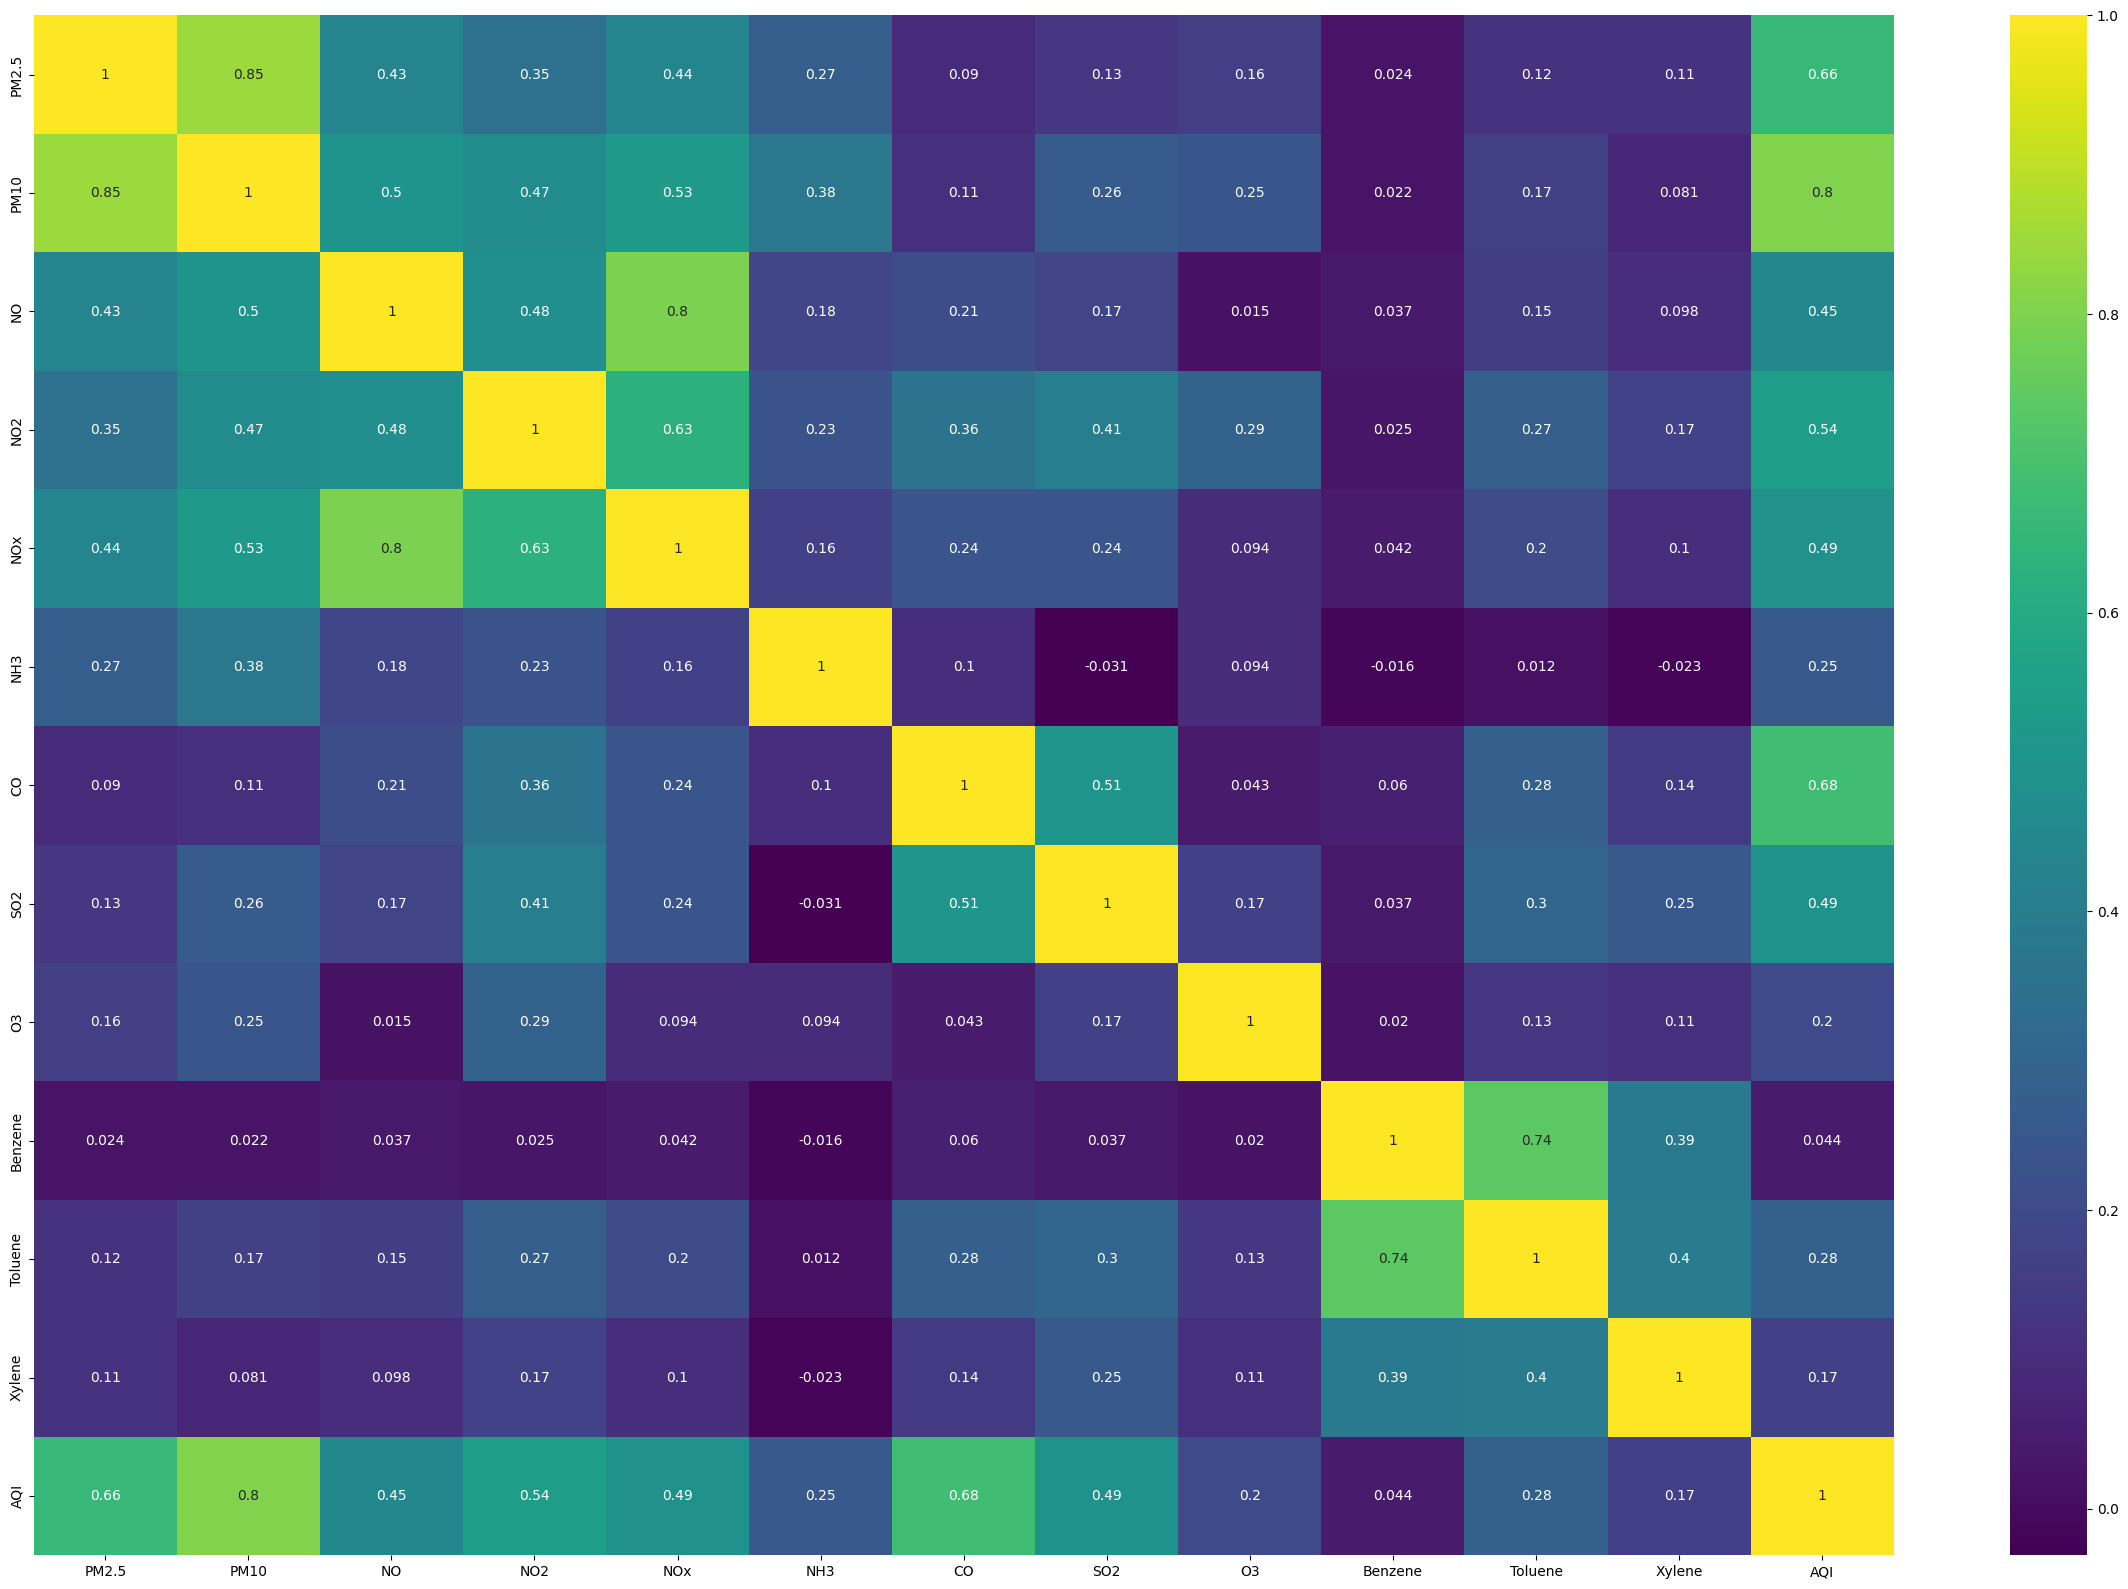

In [ ]:
corrmat=DataCleaned.corr()
top_corr_feature=corrmat.index
plt.figure(figsize=(30,20))
# to plot heat map
g=sns.heatmap(Data[top_corr_feature].corr(),annot=True,cmap='viridis')

In [ ]:
feature=DataCleaned
feature=feature.drop('Date',axis=1)
feature=feature.drop('City',axis=1)
feature=feature.drop('AQI', axis=1)
feature=feature.drop('AQI_Bucket', axis=1)
feature=feature.drop('O3', axis=1)
feature=feature.drop('Benzene', axis=1)
feature=feature.drop('Toluene', axis=1)
feature=feature.drop('Xylene', axis=1)
feature=feature.drop('PM2.5', axis=1)
feature=feature.drop('PM10', axis=1)
feature=feature.drop('NO', axis=1)
feature=feature.drop('SO2', axis=1)
feature=feature.drop('NOx', axis=1)



feature.head()

,NO2,NH3,CO
0,28.71,23.612269,6.93
1,28.68,23.612269,13.85
2,32.66,23.612269,24.39
3,42.08,23.612269,43.48
4,35.31,23.612269,54.56


In [ ]:
#Using the selected columns
#independent var

X = np.asarray(feature)

#dependent variable
y = np.asarray(DataCleaned['AQI_Bucket'])

y[0:100]

array([3, 4, 5, 5, 5, 5, 3, 1, 1, 3, 4, 4, 3, 4, 3, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 3, 6, 1, 5, 4, 5, 6, 6, 1, 3, 3, 4, 3, 3, 3, 3, 1,
       3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 3, 1, 3, 6, 4, 4,
       4, 5, 6, 1, 1, 3, 3, 4, 5, 5, 3, 4, 4, 4, 1, 6, 3, 3, 3, 6, 6, 3,
       4, 3, 4, 5, 4, 3, 1, 1, 1, 3, 3, 3])

In [ ]:
#Dividing into Train Test
#train
from sklearn.model_selection import train_test_split

X_train, x_test, y_train, y_test= train_test_split(X ,y ,test_size = 0.3,random_state = 4)
X_train.shape
print( y_train.shape)

(18825,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier with increased number of estimators and other hyperparameters
rf_classifier = RandomForestClassifier(n_estimators=150,
                                       max_depth=20,
                                       min_samples_split=5,
                                       min_samples_leaf=2,
                                       random_state=42)

# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.5298382598996096
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.66      0.60      1598
           1       0.52      0.60      0.56      1799
           2       0.53      0.29      0.37       253
           3       0.38      0.22      0.28       572
           4       0.43      0.40      0.42       468
           5       0.74      0.52      0.61       271
           6       0.71      0.44      0.54       418

    accuracy                           0.53      5379
   macro avg       0.55      0.45      0.48      5379
weighted avg       0.53      0.53      0.52      5379



In [ ]:
!pip install joblib
import joblib



# Save Random Forest model
joblib.dump(rf_classifier, 'random_forest_model.pkl')



['random_forest_model.pkl']

In [ ]:
import numpy as np

# Define the input features manually
# Replace these values with your actual feature values
input_features = [[200.0,0.7,300.5]]

# Convert the input features to a numpy array
input_features_array = np.array(input_features)

# Reshape the input features if necessary (for a single sample)
input_features_array = input_features_array.reshape(1, -1)

# Use the trained Random Forest classifier to make predictions on the input features
predicted_label = rf_classifier.predict(input_features_array)

# Print the predicted label
print("Predicted Label:", predicted_label[0])

Predicted Label: 5
